# Compress Image

In this exercise, I implement the **K-means clustering algorithm** and apply it to **compress an image**. I will first start on an example 2D dataset that will help us gain an intuition of how the K-means algorithm works. After this, I will use the K-means algorithm for image compression by reducing the number of colors occuring in an image to only those most common in that image. In this work, I mainly use **MATLAB/Octave** to write codes. 

## 1. Implement *K* -means ##

The K-means algorithm is a method to automatically cluster similar data samples together. In practice, we are given a training set $\{x^{(1)},\ldots, x^{(m)}\}$, where $x^{(i)} \in \mathbb{R}^n$), and want to group the data into a few _clusters_ , *K*. 

The K-means algorithm is outlined in the following:

```octave
% Initialize centroids
centroids = kMeansInitCentroids(X, K);
for iter = 1: iterations
    % Cluster assignment step: Assign each data point to the closest centroid.
    % idx(i) corresponds to label of centroid, or the index of the centroid assigned to example i.
    idx = findClosestCentroids(X, centroids);
    
    % Move centroid step: Compute means based on centroid assignments
    centroids = computeMeans(X, idx, K)

endfor
```

The algorithm repeatedly carries out two steps: (i) Assigning each training example $x^{(i)}$ to its closest centroid, and (ii) Recomputing the mean of each centroid using the points assigned to it. The K-means algorithm will always converge to some final set of means for centroids. Note that the converged solution may not always be global minimum, and it depends on the initial setting of the centroids indeed. This is why one has to run a few times with different random initializations.

- `findClosestCentroids(X, centroids)` is the function to assign every training example $x^{(i)}$ to its closes centroid,

$$c^{(i)} := j \text{ that minimizes } ||x^{(i)}-\mu_j||^2 $$

where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$, and $\mu_j$ is the position of the $j$'th centroid.

- `computeMeans(X, idx, K)` is the function to recompute, for each centroid, the mean of the points that were assigned to it.

$$ \mu_k := \frac{1}{|C_k|} \sum_{i\in C_k} x^{(i)},$$

where $C_k$ is the set of examples assigned to centroid $k$, and $|C_k|$ is number of examples assigned to centroid $k$.


## 2. *K*-means on Example Dataset

In order to understand how *K*-means works, we run the *K*-means algorithm on a toy 2D dataset with 10 iterations and 3 centroids (K=3). In the following figure, I show how centroids move after each iteration. 

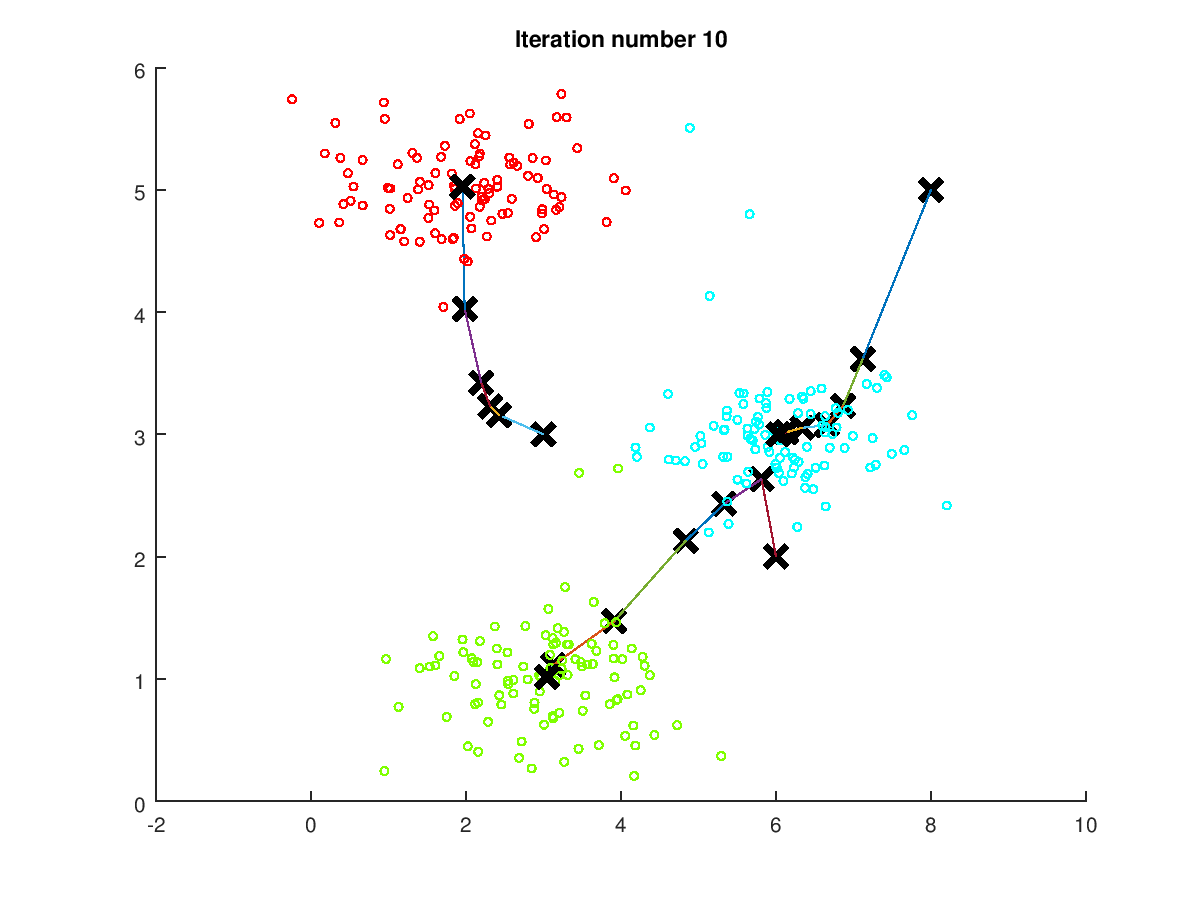

In [1]:
from IPython.display import Image
Image(filename='Figure/kmeans.png')

## 3. Random Initialization ##

In previous toy 2D dataset, the initial assignments of centroids for the example dataset were designed such that we will see the same above figure. Indeed, a good strategy for initializing the centroids is to select random examples from the training set. Then run *K*-means many times and pick up the one leading to the lowest value of cost function. The reason why we pick up random initialization and run *K*-means for many times is because this algorithm will not always yield global minimum of the cost function, or distortion. If we are not lucky, it is possible to get result for local minimum of cost function, not global minimum.

Here is the function `kMeansInitCentroids.m` to do random initialization:

```octave
   % Initialize the centroids to be random examples

   % Randomly reorder the indices of examples

   randidx = randperm(size(X,1));

   % Take the first K examples as centroids

   centroids = X(randidx(1:K), :);
```

The code above frist randomly permutes the indices of the examples by using `randperm`. Then it selects the first *K* examples based on the random permutation of the indices.

## 4. Image Compression with *K*-means ##


I now apply *K*-means to image compression for the following figure:

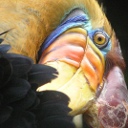

In [2]:
from IPython.display import Image
Image(filename='Figure/bird_small.png')

In a 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers, ranging from 0 to 255), that denote the red (R), green (G), and blue (B) intensity values. It is known as the RGB encoding. Original image contains thousands of colors. After image compression, we will reduce the number of colors to 16 colors.

